## Linear Regression

*(Coding along with the Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/) by Alexander Hagmann.)*

### Regression Analysis – Simple Linear Regression Model

The purpose of simple linear Regression is to explain (the variation in) a dependent variable by (the variation in) a single independent variable.

- Dependent / explained / predicted variable: Movie Revenue (Y)

- Independent / explanatory / predicting variable: Movie Budget (X)

- Setting up a linear equation (straight line):

<img src="../assets/images/linear_equation_formula.png" width="70%" />

- The residual captures the difference between the data and the regression line. Having some significant residual usually means that there are other factors involved that explain the dependent variable (in our case this would mean it's not the budget alone that is responsible for the gained revenue).

<img src="../assets/images/linear_equation_graph.png" width="70%" />

- The linear regression model identifies the straight line that best fits our data. Best fit means we select a line that best reduces the error terms.

*(Screenshots taken from Alexander Hagmann's Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/).)*


### A Simple Linear Regression Model with Python

We're going to create a __simple linear regression model__ in Python (with the help of NumPy, SciPy and Seaborn) with the __independent variable Movie Budget__ and one __dependent variable Movie Revenue__. We're going to visualize and interpret the __regression coefficients__.

<img src="../assets/images/revenue_formula.png" width="40%" />


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2, suppress= True)

In [2]:
# importing our data and setting release_date as the datetime index
df = pd.read_csv("../assets/data/bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [3]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [4]:
# focusing on more recent data
df = df.loc["2016"] # cutting out the 2016 release dates and overwriting the dataframe

In [5]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


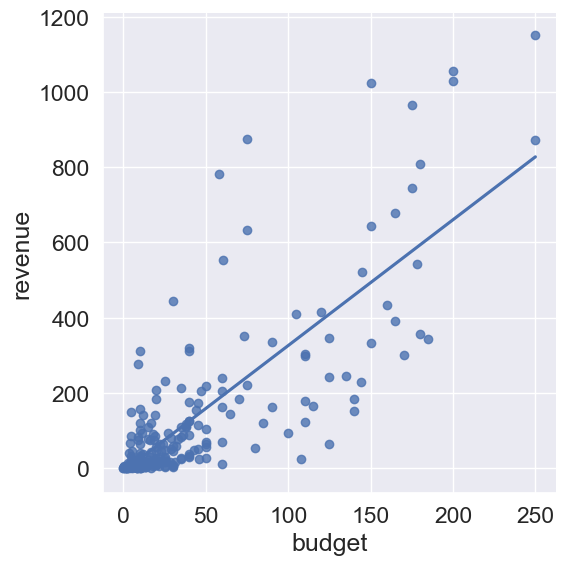

In [22]:
# ceating a visual solution with seaborn
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 6, ci = None)
plt.show()

### Linear Regression with NumPy

In [7]:
x = df.iloc[:, -2].values # selecting the budget column and converting it to a numpy array with values
x

array([ 25.  ,   9.9 ,  10.  ,   5.2 ,  50.  ,  18.  ,  40.  ,  38.  ,
        11.5 ,  38.  ,  10.  ,   4.5 ,   3.5 , 145.  ,  80.  ,   0.3 ,
        20.  ,   0.  ,  13.5 ,   0.3 ,  10.  ,  28.  ,   0.33,  22.  ,
        13.  ,  50.  ,  60.72,  58.  ,   5.  , 150.  ,  14.  ,  18.  ,
        20.  ,  10.72,  20.  ,   3.5 ,   5.  ,  35.  , 140.  ,  23.  ,
         8.  ,  60.  ,   0.  ,   5.21,   6.7 ,  35.  , 110.  ,  15.  ,
        18.5 ,   4.  ,   2.5 ,   2.1 ,  16.  , 250.  ,  18.  ,  10.  ,
         5.  ,   3.2 ,  10.  , 115.  , 175.  ,  29.  ,  20.  ,  31.5 ,
        16.  ,   5.  ,  20.  ,  10.  ,  15.  ,  20.  ,  30.  , 250.  ,
        25.  ,  16.5 ,  35.  ,  10.  ,  29.  ,  30.  ,  73.  ,  27.  ,
        40.  ,   4.  ,  50.  , 178.  ,   2.  ,   9.8 , 160.  , 170.  ,
         3.  , 135.  ,   8.57, 140.  ,  20.  ,  90.  ,   7.  ,   5.07,
         3.5 ,  50.  , 200.  ,   5.98,  75.  , 165.  , 105.  ,   3.  ,
        17.  ,  10.  ,   0.52,  50.  ,  10.  , 180.  ,   5.  ,   5.  ,
      

In [8]:
y = df.iloc[:, -1].values # selecting the revenue column and converting it to a numpy array with values
y

array([   1.4 ,    2.4 ,   40.06,    9.2 ,   69.41,   17.06,  124.83,
        109.91,   94.07,  112.34,   64.19,   32.  ,    0.62,  521.17,
         52.1 ,    2.1 ,   21.16,    0.  ,    3.34,    2.5 ,   18.73,
         16.37,    1.6 ,   63.65,    1.65,   55.97,  553.81,  783.11,
          0.44, 1023.78,    3.62,    6.21,   46.07,    2.98,   12.64,
         40.42,   24.8 ,   25.18,  150.68,   46.15,    0.03,  205.75,
          0.  ,    5.9 ,   12.12,   23.08,  179.25,  108.29,    6.49,
         13.62,    0.23,    0.28,   73.88,  873.26,   88.92,    3.4 ,
         23.51,    4.27,    1.98,  164.6 ,  966.55,   78.64,    8.82,
         14.71,   29.25,    3.22,   55.03,   27.31,   20.57,   14.4 ,
          4.21, 1153.3 ,   48.42,    0.02,  108.76,   15.  ,   48.9 ,
         43.76,  349.78,   93.28,  320.17,   10.9 ,   62.79,  543.93,
          0.34,    2.34,  433.68,  299.37,   14.02,  245.62,    1.98,
        183.35,  207.95,  334.9 ,    1.33,    4.82,    1.49,  216.97,
       1028.57,   14

In [9]:
# creating a linear regression model with np.polyfit
# deg = 1 performs a simple linear regression; deg => degree of the fitting
reg = np.polyfit(x = x, y = y, deg = 1) 
reg # returns to regression coefficients
# first coefficient is the slope coefficient
# second coefficient is the intercept

array([ 3.35, -9.45])

In [23]:
# same procedure with passing the columns of the dataframe (same result as above)
np.polyfit(x = df.budget, y = df.revenue, deg = 1)

array([ 3.35, -9.45])

In [11]:
# now we're going to visualize our linear regression line
# we need two datapoints to visualize the line, min value in x and max value in x
X = np.array([min(x), max(x)]) #creating x and y values for regression line

In [12]:
X # minimum and maximum budget 

array([  0., 250.])

In [24]:
# calculating the corresponding y values with numpy's polyval function
Y = np.polyval(reg, X)

In [25]:
Y

array([ -9.45, 827.91])

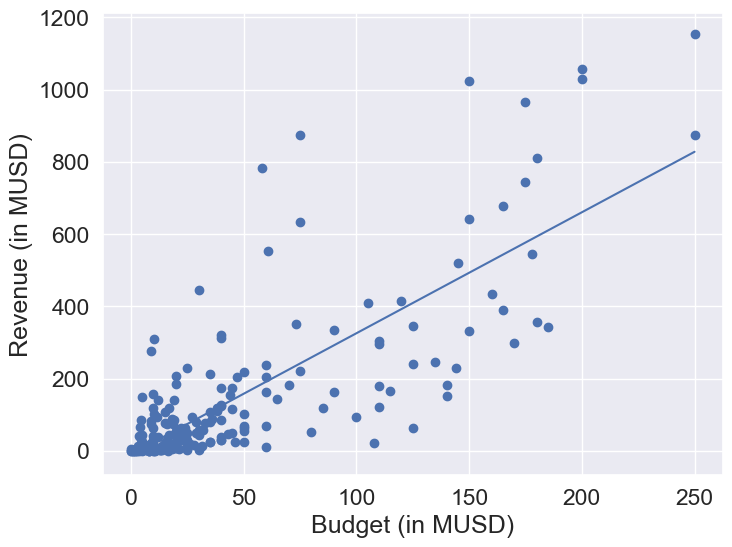

In [26]:
# creating plot with datapoints and straight regression line
plt.figure(figsize = (8, 6))
plt.plot(X, Y) # plotting the linear regression line
plt.scatter(x = x, y = y) # scatterplot with 235 data points
plt.xlabel("Budget (in MUSD)")
plt.ylabel("Revenue (in MUSD)")
plt.show()

### Linear Regression with SciPy

In [16]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [27]:
# linear regression between budget and revenue with scipy
stats.linregress(x = df.budget, y = df.revenue)

LinregressResult(slope=np.float64(3.3494240988498905), intercept=np.float64(-9.449215053886661), rvalue=np.float64(0.8001327462030164), pvalue=np.float64(1.238743107523989e-53), stderr=np.float64(0.16449519793934378), intercept_stderr=np.float64(10.75090807524931))

stats.linregress() returns coefficients and some metrics for the linear regression:

- __slope__=np.float64(3.3494240988498905)
- __intercept__=np.float64(-9.449215053886661)
- __rvalue__=np.float64(0.8001327462030164)
- __pvalue__=np.float64(1.238743107523989e-53)
- __stderr__=np.float64(0.16449519793934378)
- __intercept_stderr__=np.float64(10.75090807524931))

### How to interpret the Regression Coefficients Intercept and Slope

In [18]:
stats.linregress(x = df.budget, y = df.revenue)

LinregressResult(slope=np.float64(3.3494240988498905), intercept=np.float64(-9.449215053886661), rvalue=np.float64(0.8001327462030164), pvalue=np.float64(1.238743107523989e-53), stderr=np.float64(0.16449519793934378), intercept_stderr=np.float64(10.75090807524931))

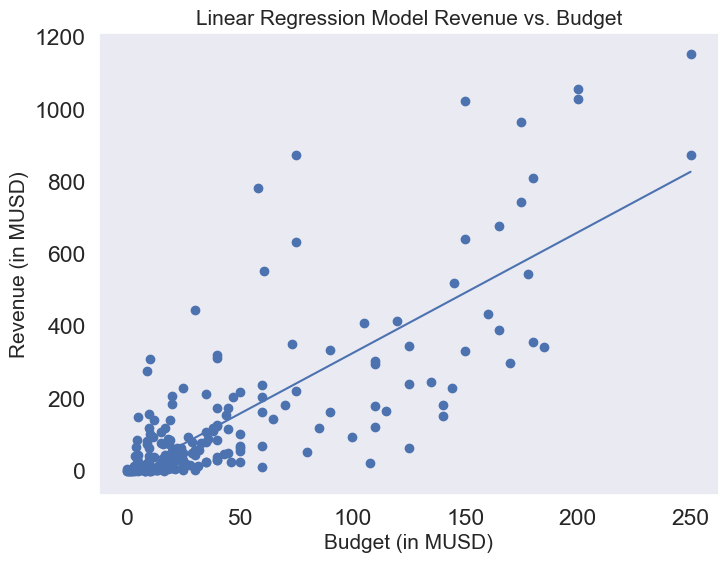

In [29]:
# first we visualize the regression coefficients to get a better understanding of them
plt.figure(figsize = (8, 6))
plt.plot(X, Y)
plt.grid()
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.title("Linear Regression Model Revenue vs. Budget", fontsize = 15)
plt.show()

#### __Explaing the regression coefficients__

<img src="../assets/images/intercept_and_slope.png" width="70%" />

- The __intercept__ represents the value of for the dependent variable (revenue) at the point of intersection of the regression line with the y axis. We might also say that the intercept estimates the revenue when the budget is zero. In this example whenever the budget is zero we would expect a revenue off -9.45 million dollars (a negative value doesn't make sense here).

- Second we have the __slope coefficient__, which is actually the slope of the regression line. Mathematically the slope of a line can be calculated by dividing delta-Y by delta-X. In our example we're dividing delta-revenue by delta-budget and get 3.35 as a result.

- The interpretation for the slope is that it is the change in the dependent variable for a one unit change in the independent variable. If we, in our example, have a 1 Million US$ change in the budget (= a 1 unit change), then we would expect an increase in revenues for 3.5 Million US$ (= 3.5 units).
 
A simple way to calculate the slope coefficient:

<img src="../assets/images/slope_formula.png" width="25%" />

The slope coefficient is the covariance of X and Y divided by the variance of X.


*(Screenshots taken from Alexander Hagmann's Udemy Couse [Python for Business and Finance](https://www.udemy.com/course/complete-python-for-business-and-finance-bootcamp/).)*


In [31]:
# double check with python
# calculating the slope coefficient
# which is the covariance of X and Y divided by the variance of X
df.budget.cov(df.revenue) / df.budget.var()

np.float64(3.3494240988498905)